In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import pairwise_distances
from scipy.spatial import distance_matrix

#from sklearn import cluster
#from sklearn.preprocessing import StandardScaler
%matplotlib inline

 ## Input: 1) Base de datos de enzimas ("semillas") clasificadas en dos familias: Familia 1 (4 enzimas) y Familia 2 (3 enzimas).
 ## 2) Base de datos de genomas (17 genomas).
 
 

In [3]:
##Dataframe con el primer blast: Semillas vs Genomas:
df1 = pd.read_csv("/home/csar/Proyectos/Posdoc/Proyecto_pos/CsarPos/blast_EF_vs_GenomeDB/pscplos17.blast", sep = "\t", names = ['query', 'subject',
           'pc_identity', 'aln_length', 'mismatches', 'gaps_opened',
           'query_start', 'query_end', 'subject_start', 'subject_end',
           'e_value', 'bitscore'], engine = 'python')


##Dataframe con el segundo blast: Genomas vs Semillas: ("Revisar si en este punto los genomas corresponden
# a los de las familias expandidas")
df2 = pd.read_csv("/home/csar/Proyectos/Posdoc/Proyecto_pos/CsarPos/blast_Genomes_vs_EF/vueltalos17.blast.uniq",sep = "\t", names = ['query', 'subject',
           'pc_identity', 'aln_length', 'mismatches', 'gaps_opened',
           'query_start', 'query_end', 'subject_start', 'subject_end',
           'e_value', 'bitscore'], engine = 'python')


##Dataframe con el tercer blast: ExpFam_1 vs MIBiG:
df3_1 = pd.read_csv("/home/csar/Proyectos/Posdoc/Proyecto_pos/CsarPos/blast_ExpFam_vs_NP/1.fasta_ExpandedVsNp.blast",sep = "\t", names = ['query', 'subject',
           'pc_identity', 'aln_length', 'mismatches', 'gaps_opened',
           'query_start', 'query_end', 'subject_start', 'subject_end',
           'e_value', 'bitscore'], engine = 'python')

##Dataframe con el tercer blast: ExpFam_2 vs MIBiG:
df3_2 = pd.read_csv("/home/csar/Proyectos/Posdoc/Proyecto_pos/CsarPos/blast_ExpFam_vs_NP/2.fasta_ExpandedVsNp.blast",sep = "\t", names = ['query', 'subject',
           'pc_identity', 'aln_length', 'mismatches', 'gaps_opened',
           'query_start', 'query_end', 'subject_start', 'subject_end',
           'e_value', 'bitscore'], engine = 'python')
##Dataframe conel blast: MIBig vs GenomeDB:
#df4 = pd.read_csv("/home/csar/Proyectos/Posdoc/Proyecto_pos/CsarPos/blast_NP_vs_GenomeDB/NPvsGenomes.blast",sep = "\t", names = ['query', 'subject',
#           'pc_identity', 'aln_length', 'mismatches', 'gaps_opened',
#           'query_start', 'query_end', 'subject_start', 'subject_end',
#           'e_value', 'bitscore'], engine = 'python')

In [8]:
df1

,query,subject,pc_identity,aln_length,mismatches,gaps_opened,query_start,query_end,subject_start,subject_end,e_value,bitscore
0,3PGA_AMINOACIDS|1|Phosphoglycerate_dehydrogena...,gi|6666666.146852.1090|6666666.146852|NC_00293...,79.62,530,108,0,1,530,1,530,0.000000e+00,847.0
1,3PGA_AMINOACIDS|1|Phosphoglycerate_dehydrogena...,gi|749927.13.1727|749927.13|NC_014318.1|D3phos...,59.59,532,213,2,1,530,1,532,0.000000e+00,620.0
2,3PGA_AMINOACIDS|1|Phosphoglycerate_dehydrogena...,gi|1156913.7.6305|1156913.7|NC_021252.1|D3phos...,59.20,527,214,1,1,526,1,527,0.000000e+00,613.0
3,3PGA_AMINOACIDS|1|Phosphoglycerate_dehydrogena...,gi|6666666.104540.4265|6666666.104540|AOHO01|D...,59.20,527,214,1,1,526,1,527,0.000000e+00,612.0
4,3PGA_AMINOACIDS|1|Phosphoglycerate_dehydrogena...,gi|446462.15.6083|446462.15|NC_021252.1|D3phos...,60.34,532,209,2,1,530,1,532,0.000000e+00,595.0
...,...,...,...,...,...,...,...,...,...,...,...,...
418,3PGA_AMINOACIDS|2|Phosphoserine_aminotransfera...,gi|6666666.146852.774|6666666.146852|NC_002935...,61.33,362,139,1,1,362,11,371,5.000000e-165,471.0
419,3PGA_AMINOACIDS|2|Phosphoserine_aminotransfera...,gi|6666666.146872.438|6666666.146872|NC_017803...,60.06,363,145,0,1,363,12,374,9.000000e-165,471.0
420,3PGA_AMINOACIDS|2|Phosphoserine_aminotransfera...,gi|6666666.111572.2478|6666666.111572|NC_00948...,64.64,362,126,2,1,362,302,661,1.000000e-156,460.0
421,3PGA_AMINOACIDS|2|Phosphoserine_aminotransfera...,gi|367928.21.407|367928.21|NC_008618.1|Phospho...,57.30,370,151,2,1,363,11,380,6.000000e-150,433.0


<AxesSubplot: >

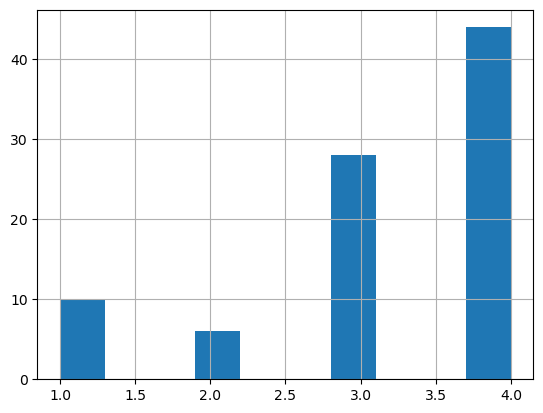

In [25]:
DF1 = df1[df1["bitscore"]>=100]
DF1
#DF1.hist(column = "bitscore")
DF1["subject"].value_counts().hist()

In [26]:
df2["query"]

0      gi|6666666.112811.3189|6666666.112811|JOEF01|C...
1      gi|6666666.111158.304|6666666.111158|NC_013131...
2      gi|6666666.111572.729|6666666.111572|NC_009480...
3      gi|6666666.146872.438|6666666.146872|NC_017803...
4      gi|6666666.112811.5311|6666666.112811|JOEF01|D...
                             ...                        
153    gi|749927.13.1890|749927.13|NC_014318.1|Glyoxy...
154    gi|452863.24.129|452863.24|NC_011886.1|D3phosp...
155    gi|6666666.104540.3584|6666666.104540|AOHO01|C...
156    gi|169133.3.1663|169133.3|LAB|Homoserine_dehyd...
157    gi|6666666.112811.3096|6666666.112811|JOEF01|D...
Name: query, Length: 158, dtype: object

In [27]:
df1.describe()
## Enzimas vs Genomas:
## query: identificador | Num de fam | Función_NumSemilla | genoma

,pc_identity,aln_length,mismatches,gaps_opened,query_start,query_end,subject_start,subject_end,e_value,bitscore
count,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,4.230000e+02,423.000000
mean,39.974917,293.378251,156.380615,4.203310,51.527187,337.513002,53.867612,341.193853,5.516379e-11,205.352246
std,12.111695,97.748995,37.400729,2.656707,45.552621,69.829679,51.258211,75.681174,9.777033e-10,181.943323
min,24.410000,92.000000,40.000000,0.000000,1.000000,279.000000,1.000000,260.000000,0.000000e+00,57.000000
25%,32.130000,238.000000,135.500000,2.000000,7.000000,304.500000,10.000000,300.000000,1.500000e-48,92.050000
50%,35.200000,265.000000,154.000000,4.000000,49.000000,313.000000,48.000000,314.000000,4.000000e-28,115.000000
75%,41.510000,324.500000,176.500000,6.000000,74.000000,325.000000,75.500000,346.000000,2.500000e-20,174.500000
max,81.600000,532.000000,280.000000,13.000000,195.000000,530.000000,302.000000,662.000000,2.000000e-08,847.000000


In [28]:
def extract_GenomeInfo(data):
    genomas_id = []
    genes_id = []
    genomas_nombres = []
    for x in data.subject:
        x_nombre = x.split("|")[-1]
        x_ID = x.split("|")[1]
        x_gi = x_ID.split(".")[0]+"."+ x_ID.split(".")[1]
        x_gen = x_ID.split(".")[2]
        genomas_nombres.append(x_nombre)
        genomas_id.append(x_gi)
        genes_id.append(x_gen)
        
    data["genoma_nombre"] = genomas_nombres
    data["id_genomas"] = genomas_id
    data["id_genes"] = genes_id
    
    data = pd.DataFrame.reindex(data, columns = ['query','subject', "id_genomas", "id_genes", "genoma_nombre",
           'pc_identity', 'aln_length', 'mismatches', 'gaps_opened',
           'query_start', 'query_end', 'subject_start', 'subject_end',
           'e_value', 'bitscore'])
    return data
    
df1 = extract_GenomeInfo(df1)
df1
#df1["subject_identif"][df1["subject_identif"]=="JOEF01"]
#df1["subject_identif"].value_counts()   

,query,subject,id_genomas,id_genes,genoma_nombre,pc_identity,aln_length,mismatches,gaps_opened,query_start,query_end,subject_start,subject_end,e_value,bitscore
0,3PGA_AMINOACIDS|1|Phosphoglycerate_dehydrogena...,gi|6666666.146852.1090|6666666.146852|NC_00293...,6666666.146852,1090,CorynebacteriumdiphtheriaeNCTC13129s,79.62,530,108,0,1,530,1,530,0.000000e+00,847.0
1,3PGA_AMINOACIDS|1|Phosphoglycerate_dehydrogena...,gi|749927.13.1727|749927.13|NC_014318.1|D3phos...,749927.13,1727,AmycolatopsismediterraneiU32s,59.59,532,213,2,1,530,1,532,0.000000e+00,620.0
2,3PGA_AMINOACIDS|1|Phosphoglycerate_dehydrogena...,gi|1156913.7.6305|1156913.7|NC_021252.1|D3phos...,1156913.7,6305,AmycolatopsisorientalisHCCB10007s,59.20,527,214,1,1,526,1,527,0.000000e+00,613.0
3,3PGA_AMINOACIDS|1|Phosphoglycerate_dehydrogena...,gi|6666666.104540.4265|6666666.104540|AOHO01|D...,6666666.104540,4265,AmycolatopsisdecaplaninaDSM44594s,59.20,527,214,1,1,526,1,527,0.000000e+00,612.0
4,3PGA_AMINOACIDS|1|Phosphoglycerate_dehydrogena...,gi|446462.15.6083|446462.15|NC_021252.1|D3phos...,446462.15,6083,ActinosynnemamirumDSM43827NC0130931s,60.34,532,209,2,1,530,1,532,0.000000e+00,595.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,3PGA_AMINOACIDS|2|Phosphoserine_aminotransfera...,gi|6666666.146852.774|6666666.146852|NC_002935...,6666666.146852,774,CorynebacteriumdiphtheriaeNCTC13129s,61.33,362,139,1,1,362,11,371,5.000000e-165,471.0
419,3PGA_AMINOACIDS|2|Phosphoserine_aminotransfera...,gi|6666666.146872.438|6666666.146872|NC_017803...,6666666.146872,438,ActinoplanesspSE50110s,60.06,363,145,0,1,363,12,374,9.000000e-165,471.0
420,3PGA_AMINOACIDS|2|Phosphoserine_aminotransfera...,gi|6666666.111572.2478|6666666.111572|NC_00948...,6666666.111572,2478,ClavibactermichiganensissubspmichiganensisNCPP...,64.64,362,126,2,1,362,302,661,1.000000e-156,460.0
421,3PGA_AMINOACIDS|2|Phosphoserine_aminotransfera...,gi|367928.21.407|367928.21|NC_008618.1|Phospho...,367928.21,407,BifidobacteriumadolescentisATCC15703s,57.30,370,151,2,1,363,11,380,6.000000e-150,433.0


In [86]:
DF11 = df1[df1["bitscore"]>=100]
DF11[["genoma_nombre","id_genes"]]
#DF11[["genoma_nombre","id_genes"]].value_counts().reset_index().groupby("genoma_nombre").count()

,genoma_nombre,id_genes
0,CorynebacteriumdiphtheriaeNCTC13129s,1090
1,AmycolatopsismediterraneiU32s,1727
2,AmycolatopsisorientalisHCCB10007s,6305
3,AmycolatopsisdecaplaninaDSM44594s,4265
4,ActinosynnemamirumDSM43827NC0130931s,6083
...,...,...
418,CorynebacteriumdiphtheriaeNCTC13129s,774
419,ActinoplanesspSE50110s,438
420,ClavibactermichiganensissubspmichiganensisNCPP...,2478
421,BifidobacteriumadolescentisATCC15703s,407


In [ ]:
for x in df1.loc[(df1["genoma_nombre"]=="AmycolatopsisdecaplaninaDSM44594s") & (df1["bitscore"]>100)]["query"]:
    print(x.split("|")[2])


In [ ]:
df1.loc[(df1["genoma_nombre"]=="AmycolatopsisdecaplaninaDSM44594s") & (df1["bitscore"]>100)]["id_genes"].value_counts()

In [ ]:
df1[["id_genomas", "id_genes"]].groupby(by="id_genomas").count()
#Podemos observar el número de copias por gen

In [ ]:
df2["query"][0]
# Genomas vs Enzimas:
# query: gi | identificadorGenoma.IdenificadorGen | IdentificadorGenoma | 


## Utilizamos la familia de enzimas (EF) como query sobre la base de datos de los genomas.

In [ ]:
df1.info()

In [ ]:
df1.head()

In [ ]:
df1.describe()

# Obtener las familias expandidas:

## Los genomas que aparecen en la columna "subject" son los que forman las familias expandidas. 

In [ ]:
df1.head()

## La información descrita en un query es como sigue:
## ID | familia | función_enzima dentro de la familia | genoma

## La familia 1 tiene 4 enzimas numeradas de 1 al 4, mientras que la familia 2 consta de 3 enzimas númeradas de 1 al 3.

In [ ]:
df1["query"][0]

## La información descrita en un subject es:
## GenInfo (gi) | Num de identificación del genoma + num de identificación del gen | Num de identificación del genoma | reference sequence | Organismo 

In [ ]:
df1["subject"][0]

In [ ]:
df1["query"].value_counts()

In [ ]:
df1["subject"].value_counts()

# Por cada enzima en cada familia vamos a obtener su correspondiente familia expandida .
## Primero vamos a identificar cada enzima según su familia y su número dentro de esa familia.


In [ ]:
def extract_fam_seed(data):
    fam_seed_list = []
    for x in data["query"][:]:
        x_string = x.split("|")
        x_fam = x_string[1]
        x_enz = x_string[2].split("_")[-1]
        x_value = "F"+x_fam+"S"+x_enz
        fam_seed_list.append(x_value)
    data["(fam,seed)"] = fam_seed_list
    data = pd.DataFrame.reindex(data, columns =  ['query','(fam,seed)','subject', "id_genomas", "id_genes", "genoma_nombre",
           'pc_identity', 'aln_length', 'mismatches', 'gaps_opened',
           'query_start', 'query_end', 'subject_start', 'subject_end',
           'e_value', 'bitscore'])
    return data

df1 = extract_fam_seed(df1)
df1
        

In [ ]:
df1[["(fam,seed)", "genomas", "genes"]].groupby(by = ["(fam,seed)", "genomas"]).count()
#df1.loc[["(fam,seed)", "subject"]].groupby(by = ["(fam,seed)"]).count()

# Extraer identificadores de genes 

In [ ]:
def gen_id(data):
    gen_id_list =[]
    for x in data["subject"][:]:
        x_string = x.split("|")
        x_id = x_string[2]
        x_name = x_string[-1]
        x_value = x_id +"|"+ x_name
        gen_id_list.append(x_value)
    data["genoma"] = gen_id_list
    data = pd.DataFrame.reindex(data, columns = ['query','(fam,seed)', 'subject', "genoma",
           'pc_identity', 'aln_length', 'mismatches', 'gaps_opened',
           'query_start', 'query_end', 'subject_start', 'subject_end',
           'e_value', 'bitscore'])
    return data
df1 = gen_id(df1)
        
df1

In [ ]:
df1[["(fam,seed)", "genoma"]].groupby(by = ["(fam,seed)"]).count()

In [ ]:
tam = len(df1.index)
dicc = {}
for i in range(tam):
    dicc[str(df1["(fam,seed)"][i])] = df1["subject"][i]
dicc

    

In [ ]:
dicc

# Obtener matrices de distancias:

In [ ]:
df3_1

In [ ]:
df3_1["query"].value_counts()
df3_1["subject"].value_counts()

In [ ]:
df3_2.head()
df3_2.describe()

In [ ]:
df3_1.describe()

In [ ]:
df3_1["subject"].value_counts()